In [32]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [33]:
def get_month_data(filename):
    '''
    Take a csv file as input, extract dates and prices data and return the data
    :type: string
    :rtype: tuple
    '''
    with open(filename, 'r') as csvfile:
        csvReader = csv.reader(csvfile)
        next(csvReader)
        for row in csvReader:
            dates.append(int(row[0].split('-')[2]))  # get day number in the Timedate
            prices.append(float(row[1]))
    return dates, prices


In [34]:
def predict_month(dates, prices, x):
    '''
    Take dates and prices of one month data, and predict value given x
    Plot data and predicted data using Linear model, Polynomial model, RBF model and Sigmoid model
    :type dates: list
    :type prices: list
    :type x: integer
    :rtype tuple
    '''
    dates = np.reshape(dates, (len(dates), 1))
    svr_linear = SVR(kernel='linear', C=1e3)
    svr_poly = SVR(kernel='poly', C=1e3, degree=2)
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma = 0.2)
    svr_sigmoid = SVR(kernel='sigmoid', C=1e3)
    svr_linear.fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    svr_sigmoid.fit(dates, prices)
    
    plt.scatter(dates, prices, color='black',label='Data')
    plt.plot(dates, svr_linear.predict(dates), color='red', label='Linear Model')
    plt.plot(dates, svr_poly.predict(dates), color='yellow', label='Polynomial Model')
    plt.plot(dates, svr_rbf.predict(dates), color='blue', label='RBF Model')
    plt.plot(dates, svr_sigmoid.predict(dates), color='green', label='Sigmoid Model')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Vector regression')
    plt.legend()
    plt.show()
    return svr_linear.predict(x)[0], svr_poly.predict(x)[0], svr_rbf.predict(x)[0], svr_sigmoid.predict(x)[0]

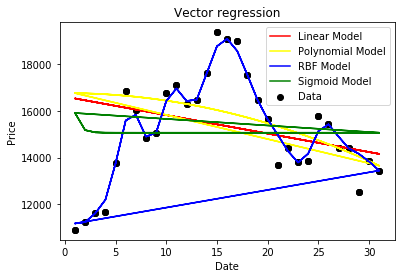

(9269.7271428579661, -11123.005001962822, 14896.325414756722, 15059.599821186066)


In [35]:
dates, prices = get_month_data('./BTC_Last_month_price.csv')
predict_BTC_month_data = predict_month(dates, prices, len(dates))
print predict_BTC_month_data